In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid") # Set visual style for professional looking plots
plt.rcParams['figure.figsize'] = (10, 6) # Default plot size

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
file_path = os.path.join("..", "data", "raw", "insurance.csv") # .. means "go up one level"

try:
    insurance_dataset = pd.read_csv(file_path)
    print(f"Data Loaded.\nShape: {insurance_dataset.shape}")
    print(f"Columns: {insurance_dataset.columns.tolist()}")
except FileNotFoundError:
    print(f"Error: Could not find file at {file_path}")

Data Loaded.
Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [3]:
nullValues = insurance_dataset.isnull().sum()
if nullValues.sum() > 0:
    insurance_dataset = insurance_dataset.dropna()
    print(f"Null Values dropped. New Shape: {insurance_dataset.shape}")
else:
    print("No Null Values Exists in the Dataset.")

duplicates = insurance_dataset.duplicated().sum() # Check for duplicates
if duplicates > 0:
    insurance_dataset = insurance_dataset.drop_duplicates() # Drop duplicates if any
    print(f"Duplicates dropped. New Shape: {insurance_dataset.shape}")

insurance_dataset.describe() # Quick stats

No Null Values Exists in the Dataset.
Duplicates dropped. New Shape: (1337, 7)


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


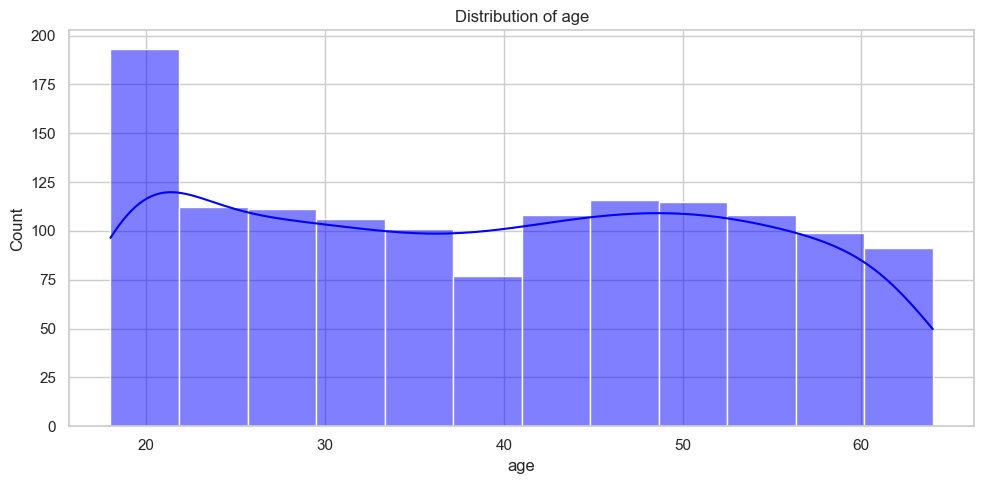

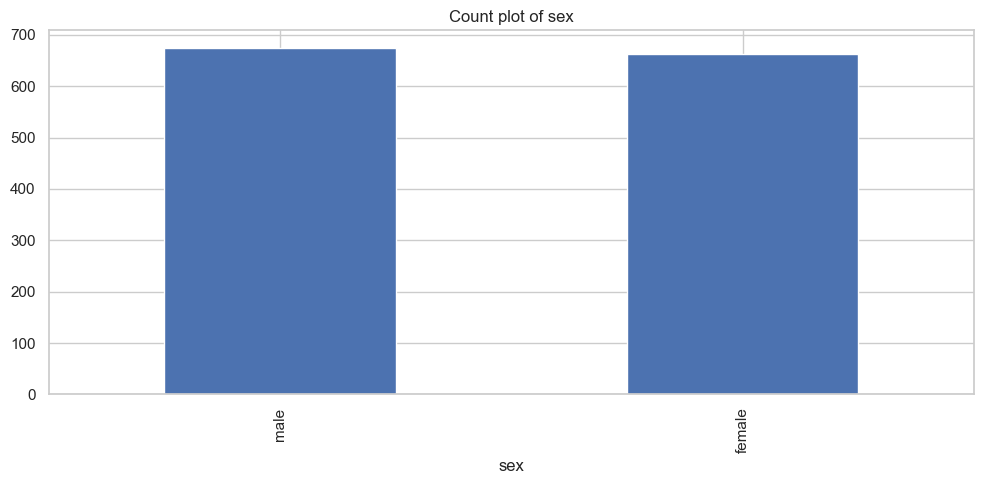

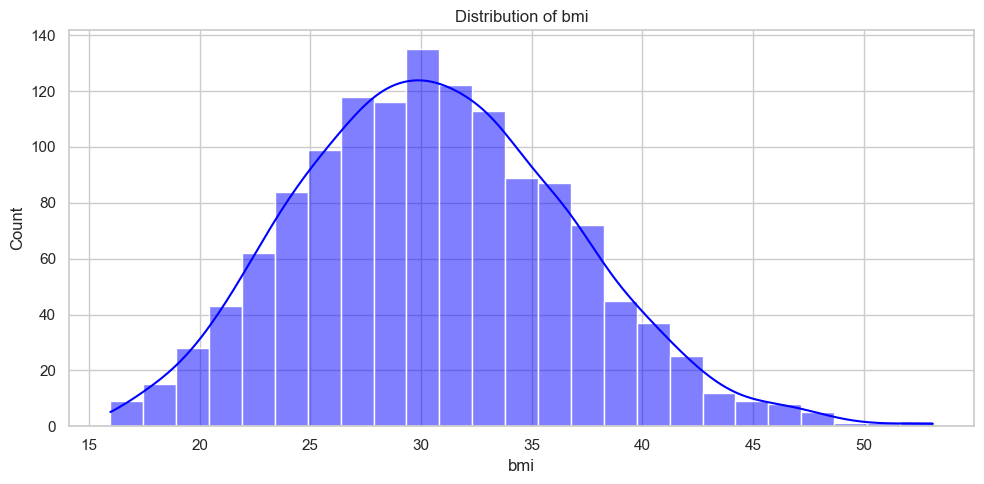

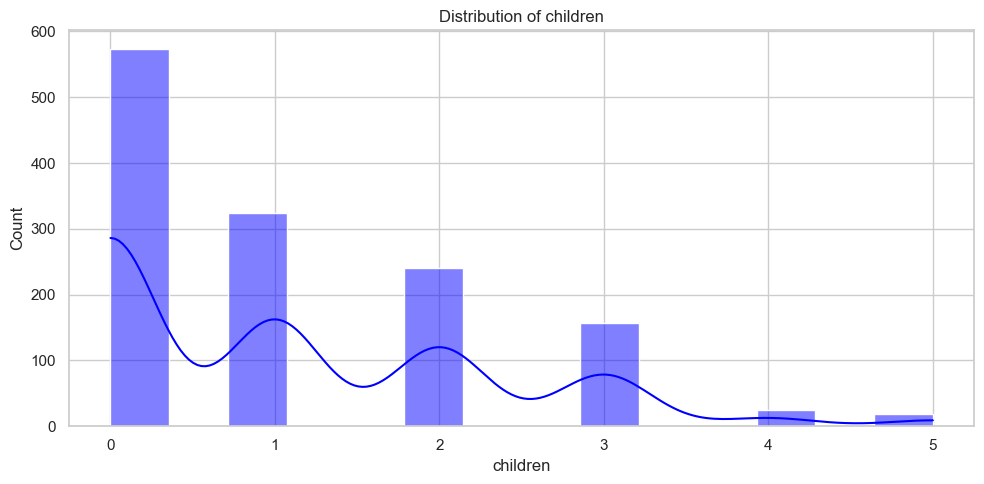

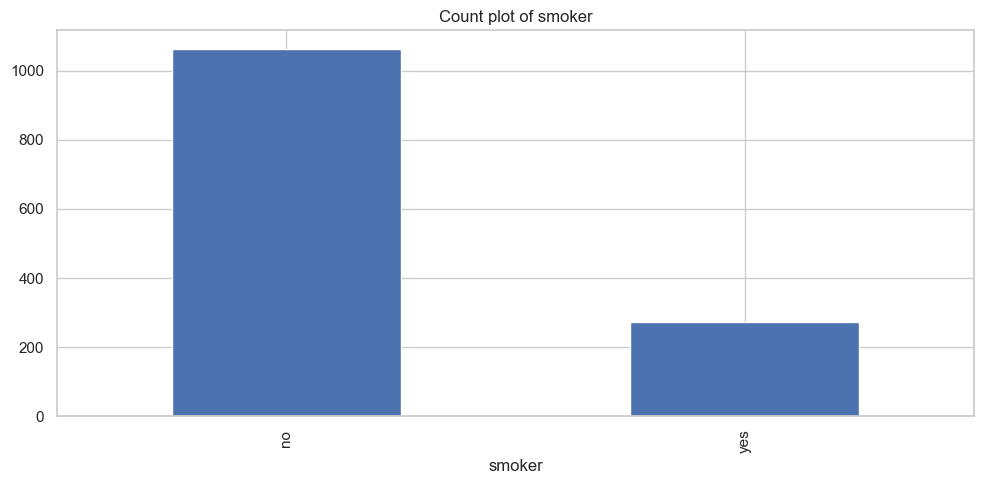

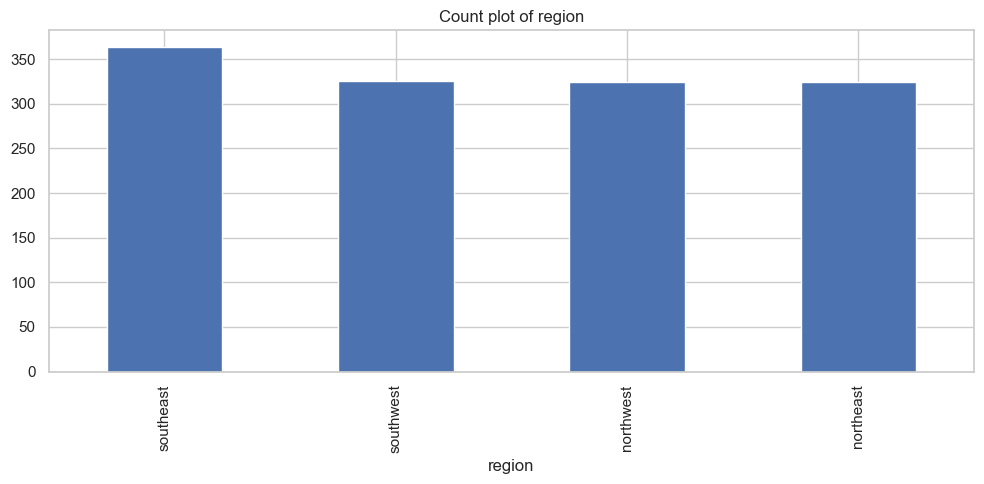

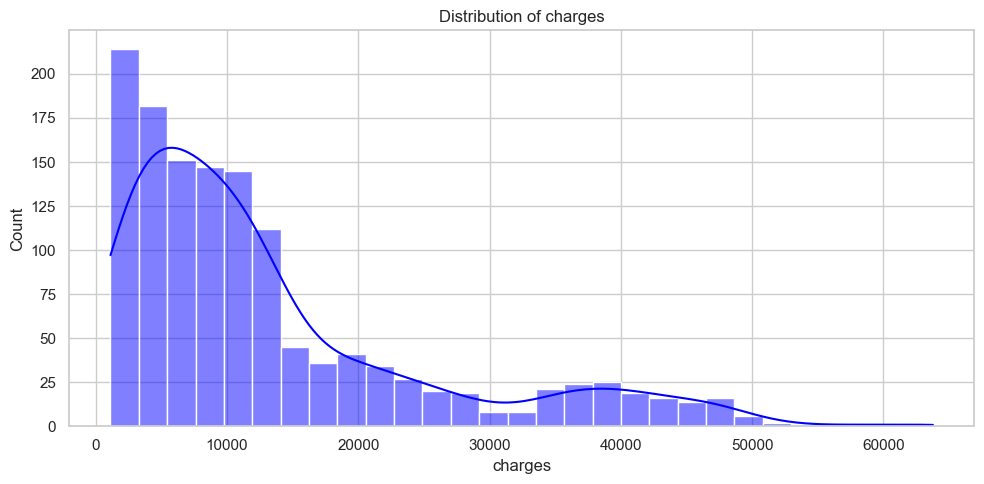

In [4]:
for col in insurance_dataset.columns:
    plt.figure(figsize=(10,5)) # width, height

    if insurance_dataset[col].dtype in ['int64', 'float64']:   # numeric columns
        sns.histplot(insurance_dataset[col], kde=True, color="blue") # kde is the smooth curve on the graph.
        plt.title(f'Distribution of {col}')

    else:  # categorical columns
        insurance_dataset[col].value_counts().plot(kind='bar') # value_counts() returns series of counting of unique values
        plt.title(f'Count plot of {col}')

    plt.tight_layout()
    plt.show()

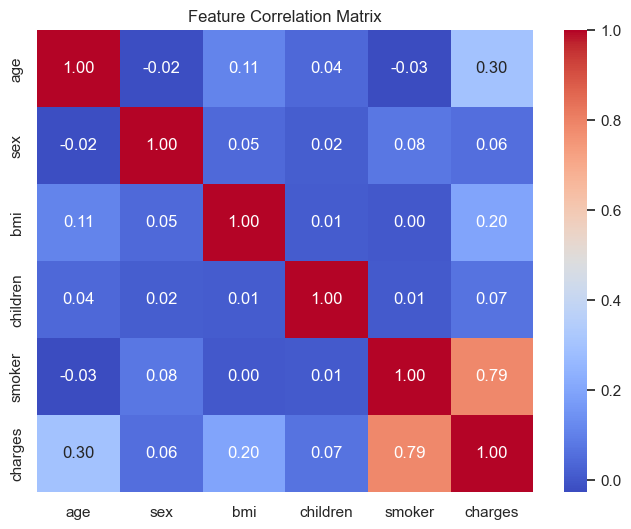

In [5]:
df_temp = insurance_dataset.copy()
df_temp['smoker'] = df_temp['smoker'].map({'yes': 1, 'no': 0}) # temporary encoding only done on categorical date since correlation map only accepts numerical data.
df_temp['sex'] = df_temp['sex'].map({'male': 1, 'female': 0})

# Calculate correlation
corr = df_temp.select_dtypes(include=np.number).corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

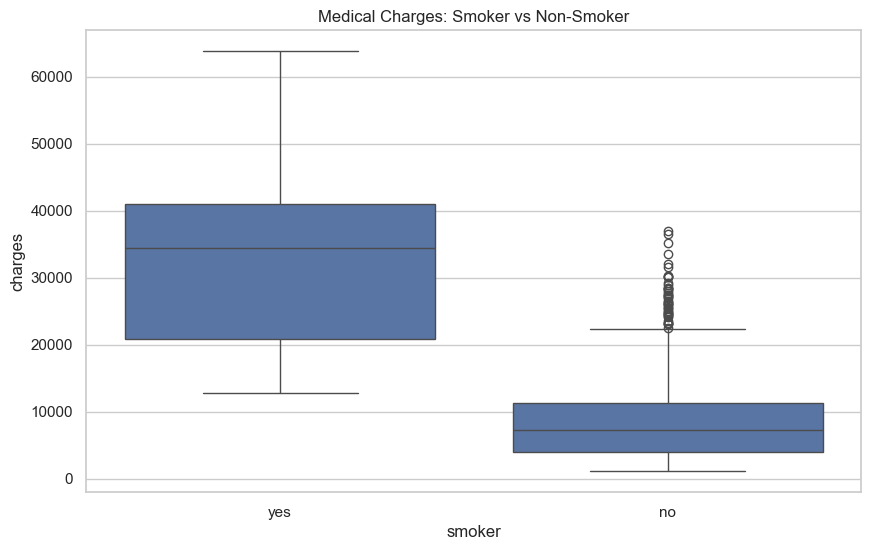

In [6]:
# Boxplot: Great for comparing categories
sns.boxplot(data=insurance_dataset, x='smoker', y='charges')
plt.title("Medical Charges: Smoker vs Non-Smoker")
plt.show()

<Figure size 1000x500 with 0 Axes>

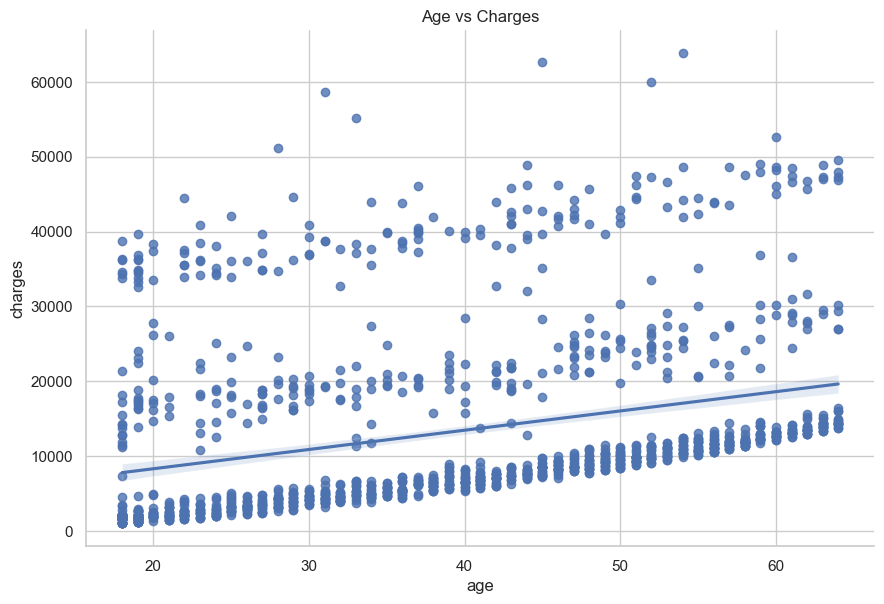

In [7]:
plt.figure(figsize=(10,5))
sns.lmplot(x='age', y='charges', data=insurance_dataset, height=6, aspect=1.5)
plt.title("Age vs Charges")
plt.show()

<Figure size 1000x500 with 0 Axes>

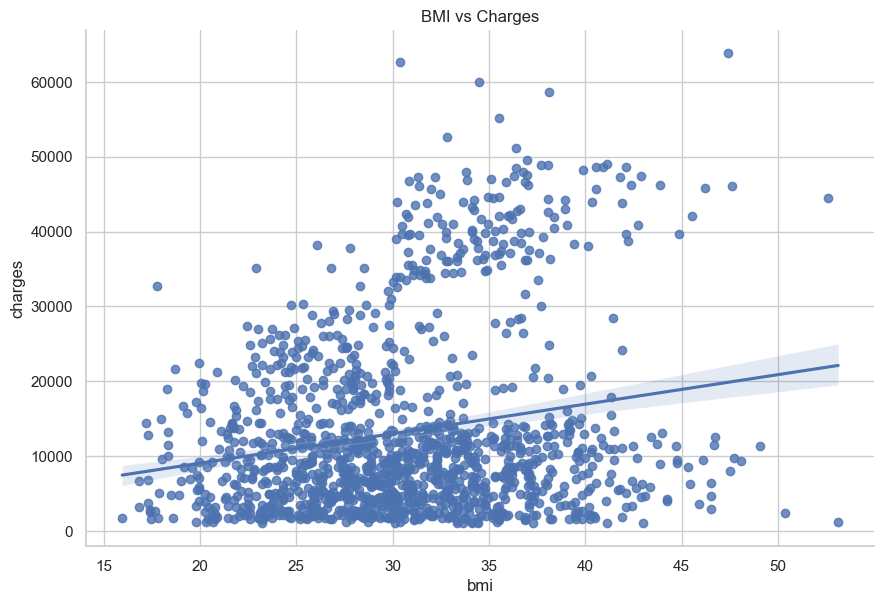

In [8]:
plt.figure(figsize=(10,5))
sns.lmplot(x='bmi', y='charges', data=insurance_dataset, height=6, aspect=1.5)
plt.title("BMI vs Charges")
plt.show()

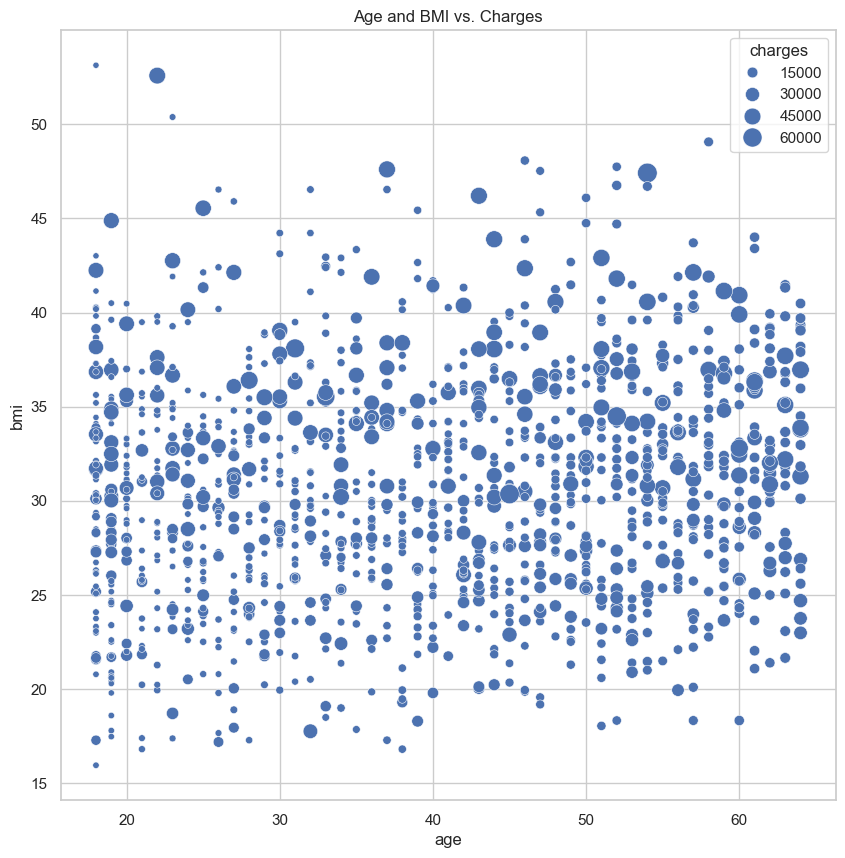

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='age', y='bmi', size='charges', sizes=(20, 200), data=insurance_dataset)
plt.title("Age and BMI vs. Charges")
plt.show()


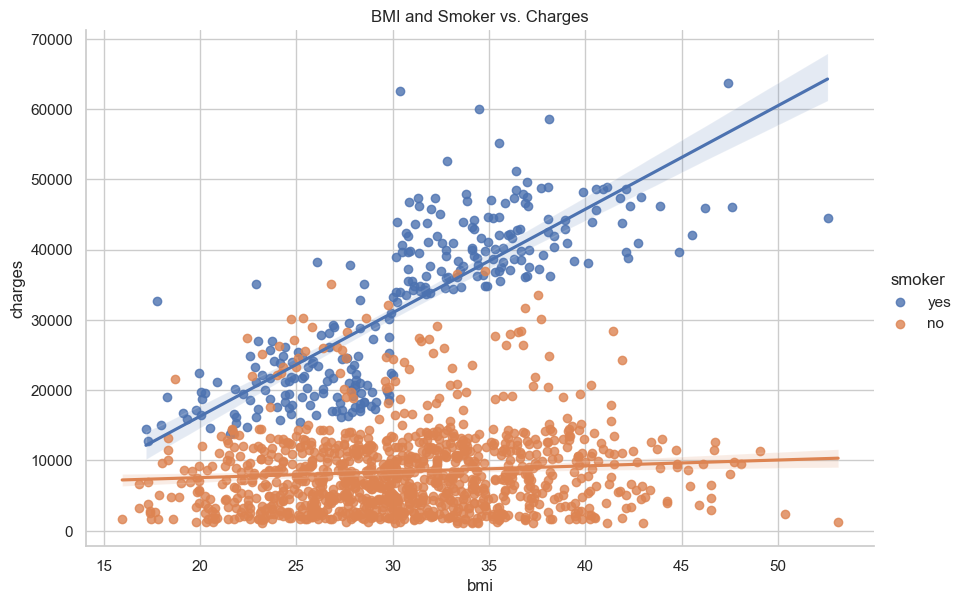

In [10]:
# Scatter plot with regression lines
sns.lmplot(data=insurance_dataset, x='bmi', y='charges', hue='smoker', height=6, aspect=1.5)
plt.title("BMI and Smoker vs. Charges")
plt.show()